Reads in Wally processing and adds it to the Mtimes and .dat file

In [1]:
import os,sys,inspect
current_dir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parent_dir = os.path.dirname(current_dir)
sys.path.insert(0, '/data/MoodGroup/actigraphy/gavi/actigraPy') 

import actigraPy.actigraPy as act
import importlib
import numpy as np
import pandas as pd
from datetime import datetime
from datetime import timedelta

/data/MoodGroup/actigraphy/gavi/actigraPy/actigraPy/actigraPy.py:23: MatplotlibDeprecationWarning: 
The matplotlib.backends.tkagg module was deprecated in Matplotlib 3.0 and will be removed in 3.2.
  import matplotlib.backends.tkagg as tkagg


In [3]:
sub = '102'
datfn = '/data/MoodGroup/actigraphy/KMOA/derivatives/preproc/subMOA-%s/%s_dat.csv'%(sub,sub)
wallyfile = '/data/MoodGroup/actigraphy/KMOA/derivatives/old_proc/subMOA-%s/%s_processed.csv'%(sub,sub)
dbfile = '/data/MoodGroup/actigraphy/KMOA/KMOA_summary.csv'

In [4]:
datfile = pd.read_csv(datfn)
wally = pd.read_csv(wallyfile)
dat = pd.read_csv(dbfile)

Get infusion time

In [5]:
dt = datetime.strptime(dat['infusion'].loc[dat['sub_no']==int(subj)].item(),'%m/%d/%Y')
dt

/data/MoodGroup/code/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `item` has been deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


datetime.datetime(2012, 1, 19, 0, 0)

In [6]:
td_list= []
for row in wally.iterrows():
    time_list = row[1]['time'].split(':')
    for idx,time in enumerate(time_list):
        if len(time)>2:
            time_list[idx]=time[-2:]
    day = row[1]['day']
    tmp= timedelta(days=day,hours=int(time_list[0]),minutes=int(time_list[1]))
    td_list.append(tmp)

In [160]:
wally['time_delta']=td_list

In [161]:
dt_list = []
for row in wally.iterrows():
    dt_list.append(dt+row[1]['time_delta'])

In [162]:
wally['DateTime']=dt_list

In [163]:
start = (datfile['DateTime'][0])
end = datfile['DateTime'].tolist()[-1]

In [150]:
end

'23-Nov-11 11:29 AM'

In [164]:
wally['DateTime'].tolist()[-1]

Timestamp('2012-02-18 00:00:00')

In [165]:
start_idx = np.where(wally['DateTime']==start)[0][0]

IndexError: index 0 is out of bounds for axis 0 with size 0

In [44]:
wally_clip = wally.truncate(before=start_idx,after=end_idx)

In [55]:
#now make a mask from wally data
datfile['w']=wally_clip['activity'].isna().astype(int).tolist()

In [57]:
datfile.to_csv(datfn)

In [58]:
datfile['w'].tolist()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


### Make Mtimes file - go to read_Mtimes!!

In [102]:
#ok now we need to find transition points
mk_w = []
past_num = 0 
for idx,num in enumerate(datfile['w'].tolist()):
    if past_num != num:
        mk_w.append(idx)
    past_num=num

In [99]:
Mtimes = pd.read_csv(os.path.join(out_dir,'%s_Mtimes_edit.csv'%sub))

In [100]:
Mtimes['Off_dt'] = [datetime.strptime(x,'%d-%b-%y %I:%M %p') for x in Mtimes['OffDate']+" "+Mtimes['OffTime']]
Mtimes['On_dt'] = [datetime.strptime(x,'%d-%b-%y %I:%M %p') for x in Mtimes['OnDate']+" "+Mtimes['OnTime']]


In [101]:
umks = np.unique(Mtimes['marker'])
mk_idx={}
mc_dict={}
test={}
for mm in umks:
    print(mm)
    c_dict = {}
    tmp = Mtimes['Off_dt'][Mtimes['marker']==mm].tolist()
    tmp.extend(Mtimes['On_dt'][Mtimes['marker']==mm].tolist())
    tmp.sort()
    test[mm]=tmp
    mk_idx[mm] = [np.where(np.asarray(awd_dat['dt_list'])==x)[0][0] for x in tmp]


    if len((Mtimes['Comment'][Mtimes['marker']==mm]).dropna()) > 0:
        c_dict['comments']=Mtimes['Comment'].loc[(Mtimes['Comment'][Mtimes['marker']==mm]).dropna().index].tolist()
        tmp = Mtimes['Off_dt'].loc[(Mtimes['Comment'][Mtimes['marker']==mm]).dropna().index].tolist()
        c_dict['idxs']=[np.where(np.asarray(awd_dat['dt_list'])==x)[0].tolist()[0] for x in tmp]
        mc_dict[mm]=c_dict

cal
g
z


In [103]:
mk_idx['w']=mk_w

In [104]:
#account for missing comments
for mm in mk_idx.keys():
    if mm in mc_dict.keys():
        for ii,idx in enumerate(mk_idx[mm]):
            if ii % 2 == 0:
                if not idx in mc_dict[mm]['idxs']:
                    mc_dict[mm]['idxs'].insert(int(ii/2),idx)
                    mc_dict[mm]['comments'].insert(int(ii/2),"")

In [119]:
all_dt_txt = []
#clumsy fix -- find a better way?
if 'M' in mk_idx.keys():    
    if len(mk_idx['M']) == 0:
        del mk_idx['M']
        del mk_idx['m']
        
for mm in mk_idx.keys():
    dt_fmt = "%d-%b-%y %I:%M %p"
    print(mm)
    # convert indices to time
    mm_dt = [ clip_dat['dt_list'][ii] for ii in mk_idx[mm] ]

    # convert the times to string
    mm_dt_tmp = [ ii.strftime(dt_fmt) for ii in mm_dt ]

    n = round(len(mm_dt_tmp)/2)
    # make 'off' and 'on' columns
    mm_dt_txt = pd.DataFrame(list(zip(mm_dt_tmp[::2],mm_dt_tmp[1::2],[mm]*n)), columns =['Off', 'On','marker'])
    for ii in ['On','Off']:
        tmp = mm_dt_txt[ii].str.split(" ", n = 1, expand = True)
        mm_dt_txt[ ii + 'Date'] = tmp[0]
        mm_dt_txt[ ii + 'Time'] = tmp[1]
    
    print(len(mm_dt_txt))
    if mm in mc_dict.keys():
        comments = mc_dict[mm]['comments']
        print(len(mc_dict[mm]['comments']))
    else:
        comments = [""]*len(mm_dt_txt)
    mm_dt_txt['Comment']=comments
    if mm=='g':
        print(mm_dt_txt)
    all_dt_txt.append(mm_dt_txt)


cal
22
22
g
23
23
                   Off                  On marker     OnDate    OnTime  \
0   25-Oct-11 12:55 PM  25-Oct-11 03:03 PM      g  25-Oct-11  03:03 PM   
1   26-Oct-11 02:05 PM  26-Oct-11 03:43 PM      g  26-Oct-11  03:43 PM   
2   27-Oct-11 09:45 AM  27-Oct-11 10:55 AM      g  27-Oct-11  10:55 AM   
3   27-Oct-11 03:05 PM  27-Oct-11 04:45 PM      g  27-Oct-11  04:45 PM   
4   29-Oct-11 12:09 PM  29-Oct-11 01:57 PM      g  29-Oct-11  01:57 PM   
5   30-Oct-11 01:03 PM  30-Oct-11 02:13 PM      g  30-Oct-11  02:13 PM   
6   03-Nov-11 03:01 PM  03-Nov-11 03:25 PM      g  03-Nov-11  03:25 PM   
7   05-Nov-11 04:11 PM  05-Nov-11 04:55 PM      g  05-Nov-11  04:55 PM   
8   08-Nov-11 02:11 PM  08-Nov-11 04:01 PM      g  08-Nov-11  04:01 PM   
9   09-Nov-11 03:05 PM  09-Nov-11 04:29 PM      g  09-Nov-11  04:29 PM   
10  10-Nov-11 04:13 PM  10-Nov-11 06:05 PM      g  10-Nov-11  06:05 PM   
11  11-Nov-11 11:03 AM  11-Nov-11 01:01 PM      g  11-Nov-11  01:01 PM   
12  12-Nov-11 03:51 

In [121]:
all_dt = pd.concat(all_dt_txt,join='outer',axis=0,sort=False)
all_dt['OffTime'] = pd.to_datetime(all_dt.OffTime)
all_dt['OffDate_dt'] = pd.to_datetime(all_dt['OffDate'])
all_dt.sort_values(by=['OffDate_dt','OffTime','marker'],ascending=True,inplace=True)
del all_dt['OffDate_dt']
all_dt['OffTime'] = all_dt.OffTime.dt.strftime(dt_fmt[9:])

all_dt = all_dt[['OffDate','OffTime','OnDate','OnTime','marker','Comment']]
   

In [123]:
all_dt

,OffDate,OffTime,OnDate,OnTime,marker,Comment
0,25-Oct-11,11:39 AM,25-Oct-11,11:53 AM,z,
1,25-Oct-11,12:19 PM,25-Oct-11,12:41 PM,z,
0,25-Oct-11,12:54 PM,25-Oct-11,03:04 PM,w,
0,25-Oct-11,12:55 PM,25-Oct-11,03:03 PM,g,3T
2,25-Oct-11,12:55 PM,25-Oct-11,03:03 PM,z,
0,25-Oct-11,01:00 PM,25-Oct-11,03:00 PM,cal,3T
3,25-Oct-11,06:15 PM,25-Oct-11,06:35 PM,z,
4,25-Oct-11,06:41 PM,25-Oct-11,06:55 PM,z,
5,25-Oct-11,09:09 PM,25-Oct-11,09:23 PM,z,
1,25-Oct-11,09:30 PM,26-Oct-11,07:00 AM,cal,Sleep study


In [124]:
all_dt.to_csv(os.path.join(out_dir,'%s_Mtimes_edit+oldproc.csv'%sub),index=False)

## Do some graphing!

In [116]:

gc=[np.asarray(mc_dict['g']['idxs']),mc_dict['g']['comments']]

30
25-Oct-11
0 765
input 0 [-101, 229]
plot this [-101, 229]
input 1 [-100, 230]
plot this [-100, 230]
[0]
26-Oct-11
766 2205
input 0 [-1611, 1709]
plot this [-1611, 1709]
input 1 [-1164, 1188, -1580, 1599, -1610, 1711]
plot this [-1164, 1188, -1580, 1599, -1610, 1711]
[1]
27-Oct-11
2206 3645
input 0 [-2791, 2861, -3111, 3211]
plot this [-2791, 2861, -3111, 3211]
input 1 [-3111, 3211]
plot this [-3111, 3211]
[2 3]
28-Oct-11
3646 5085
input 0 []
input 1 [-4408, 4420]
plot this [-4408, 4420]
[]
29-Oct-11
5086 6525
input 0 [-5815, 5923]
plot this [-5815, 5923]
input 1 [-5815, 5925]
plot this [-5815, 5925]
[4]
30-Oct-11
6526 7965
input 0 [-7309, 7379]
plot this [-7309, 7379]
input 1 []
[5]
31-Oct-11
7966 9405
input 0 []
input 1 []
[]
01-Nov-11
9406 10845
input 0 []
input 1 [-10429, 10443]
plot this [-10429, 10443]
[]
02-Nov-11
10846 12285
input 0 []
input 1 []
[]
03-Nov-11
12286 13725
input 0 [-13187, 13211]
plot this [-13187, 13211]
input 1 []
[6]
04-Nov-11
13726 15165
input 0 []
input 1 

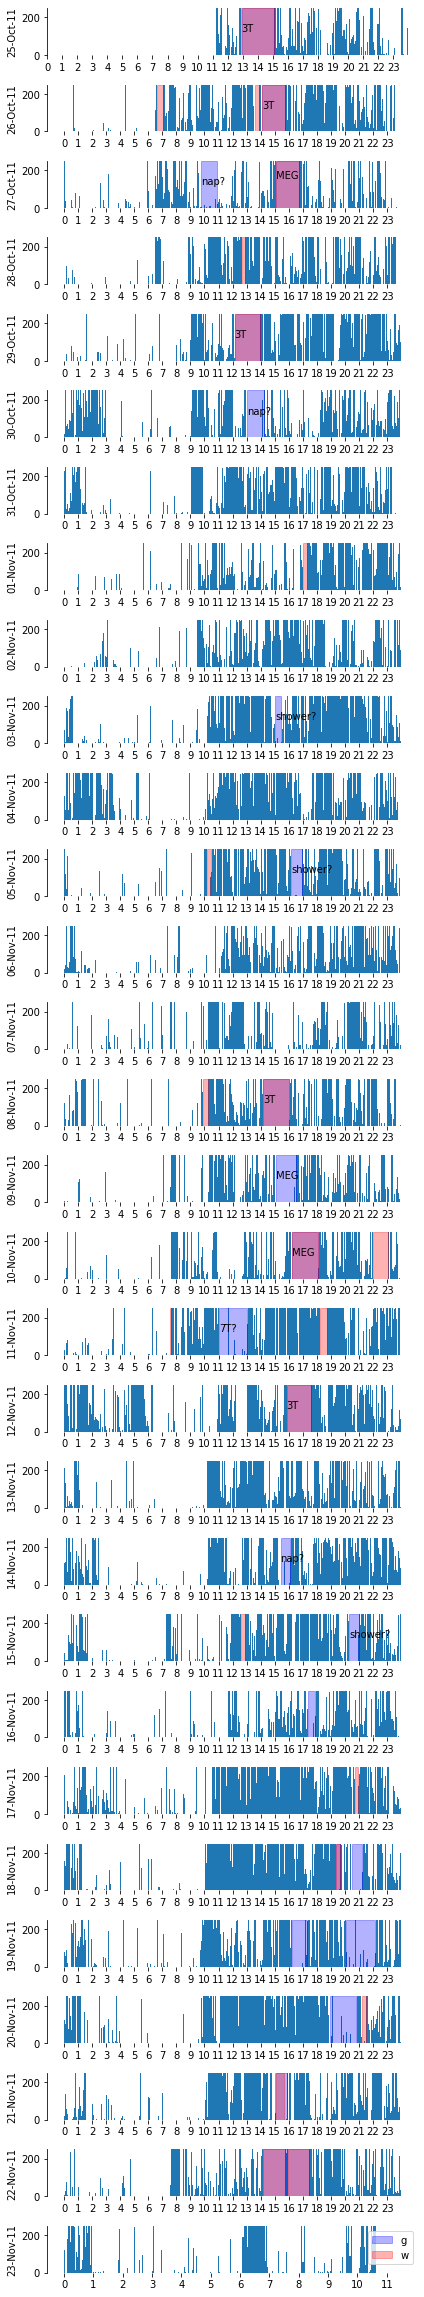

In [125]:
importlib.reload(act)

act.plot_awd(clip_dat,{'g':mk_idx['g'],'w':mk_idx['w']},max_act=250,show=False,comments=gc,fn_pref=os.path.join(out_dir,sub+'_M+proc+wally'),plot_type='single',debug=True)
